<a href="https://colab.research.google.com/github/thangchu77/DeepLearning/blob/main/Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: Implementation of Gradient Descent and apply to find the price of the house in linear dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [30]:
#Implementation of gradient descent algorithm
def GD(Xtrain, Ytrain, epochs, lr):
  weights = np.zeros((Xtrain.shape[1],1))
  cost = np.zeros((epochs, 1))
  for i in range(epochs):
    r = np.dot(Xtrain, weights) - Ytrain
    cost[i] = 0.5*np.sum(np.square(r))

    gradient = np.dot(Xtrain.T, r)
    weights -= lr * gradient

  return weights, cost


In [29]:
#Preprocess the data: Mounting, convert data frame to np array, etc.
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/2. Linear regression/data_linear.csv')
X = data.iloc[:, 0].to_numpy().reshape(-1,1)
preX = X
Y = data.iloc[:, 1].to_numpy().reshape(-1,1)
X = np.hstack((np.ones((X.shape[0],1)), X))

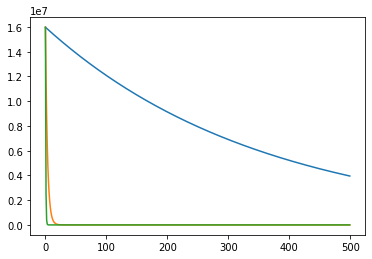

In [37]:
#For each learning rate, plot the cost 
lr = [0.00000001, 0.000001, 0.00001]
epochs = 500
for learning_rate in lr:
  weights, cost = GD(X, Y, epochs, learning_rate)
  plt.plot(cost)

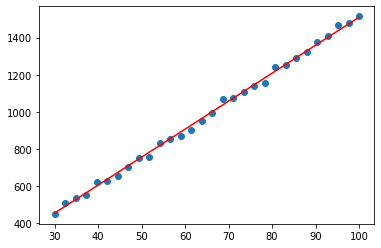

In [35]:
#Plot the predictions
predictions = np.dot(X, weights)
plt.plot(preX, predictions, c='r')
plt.scatter(preX, Y)

In [38]:
#With new input data, calculate the output price
#Notice that the gradient is large due to new_data is randomly generated
new_data = np.random.rand(1,2)
new_X = new_data[:,0].reshape(-1,1)
new_Y = new_data[:,1].reshape(-1,1)
new_X = np.hstack((np.ones((new_X.shape[0],1)), new_X))

new_prediction = np.dot(new_X, weights)
r = new_prediction - new_Y
error = 0.5*(r)**2

gradient = np.dot(new_X.T, r)


# Question 2: Try to apply polynomial regression and find the most fitted curve

(30, 1)


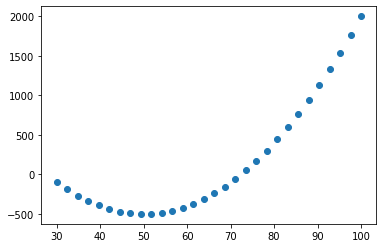

In [54]:
#Given the dataset of the parabola, how to fit the linear regression model
squaredata = pd.read_csv('/content/drive/MyDrive/Machine Learning/2. Linear regression/data_square.csv').values
Xsquare = squaredata[:,:1].reshape(-1,1)
Ysquare = squaredata[:,1].reshape(-1,1)
plt.scatter(Xsquare, Ysquare)
print(Xsquare.shape)

In [55]:
squaredata = pd.read_csv('/content/drive/MyDrive/Machine Learning/2. Linear regression/data_square.csv').values
N = squaredata.shape[0]
col = squaredata.shape[1]
x1 = squaredata[:,:-1].reshape(-1,col-1)
x2 = x1*x1
one_col = np.ones(N).reshape(-1,1)
Y = squaredata[:,-1].reshape(-1,1)
Y1 = squaredata[:,-1].reshape(-1,1)

coefficient = Y.max()
coefficient1 = [np.mean(Y1), np.std(Y1)]
X = np.concatenate((one_col, x1, x2), axis=1)
X1 = np.concatenate((one_col, x1, x2), axis=1)
#Method 1: Divide by the max
X[:,1] = X[:,1]/np.max(X[:,1])
X[:,2] = X[:,2]/np.max(X[:,2])
Y = Y/np.max(Y)
#Method 2: Standardize
X1[:,1] = (X1[:,1] - np.mean(X1[:,1]))/np.std(X1[:,1])
X1[:,2] = (X1[:,2] - np.mean(X1[:,2]))/np.std(X1[:,2])
Y1 = (Y1 - np.mean(Y1))/np.std(Y1)


In [56]:
#Obtain the weight and square cost
epochs = 10000
lr = 0.01
squareweight, squarecost = GD(X, Y, epochs, lr)
squareweight1, squarecost1 = GD(X1, Y1, epochs, lr)


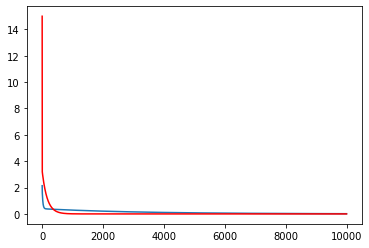

In [57]:
#Plot the cost
plt.plot(squarecost)
plt.plot(squarecost1, c='r')

In [58]:
#Print the obtained weight
print(squareweight)
print(squareweight1)

[[ 0.66985769]
 [-3.88758872]
 [ 4.15670837]]
[[ 2.65008501e-15]
 [-2.83066116e+00]
 [ 3.71755609e+00]]


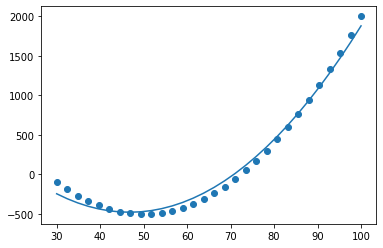

In [60]:
#Plot the curve
newY = np.dot(X, squareweight)*coefficient
newY1 = np.dot(X, squareweight)*coefficient1[1] + coefficient1[0]
plt.scatter(Xsquare, Ysquare)
plt.plot(Xsquare, newY)
#plt.plot(Xsquare, newY1, c='r')

# Question 3: Prove the formula of the gradient = $X^T(XW - Y)$

Prove the following 

Suppose $J$ denotes as loss function for gradient descent, prove that

> $\frac{dJ}{dw} = X^T(XW - Y)$ 
> Without the loss of generality, notice that $\frac{dJ}{dw} = \begin{bmatrix} \sum_{i=1}^n (x_i\dot w - y_i) \\ \sum_{i=1}^n (x_i\dot w - y_i)x_i \end{bmatrix}$ = $\begin{bmatrix} x_1 ... x_n \end{bmatrix}$ 
X = $\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ ... & ... \\ 1 & x_n\end{bmatrix}$, 
$X^T$ = $\begin{bmatrix}1 & 1 & ... & 1 \\ x_1 & x_2 & ... & x_n\end{bmatrix}$, W = $\begin{bmatrix}w_0 \\ w_1\end{bmatrix}$, Y = $\begin{bmatrix}y_1 \\ y_2 \\ ... \\ y_n \end{bmatrix}$

XW - Y = $\begin{bmatrix} w_0 + x_1\dot w_1 - y_1 \\ w_0 + x_2\dot w_1 - y_2 \\ ... \\ w_0 + x_n\dot w_1 - y_n \end{bmatrix}$
$X^T(XW - Y)$ = $\begin{bmatrix}1 & 1 & ... & 1 \\ x_1 & x_2 & ... & x_n\end{bmatrix}\begin{bmatrix} w_0 + x_1\dot w_1 - y_1 \\ w_0 + x_2\dot w_1 - y_2 \\ ... \\ w_0 + x_n\dot w_1 - y_n \end{bmatrix}$ = $\begin{bmatrix} \sum_{i=1}^n (x_i\dot w - y_i) \\ \sum_{i=1}^n (x_i\dot w - y_i)x_i \end{bmatrix}$







